In [1]:
import mxnet as mx
import numpy as np

In [2]:
#Training data
train_data = np.random.uniform(0, 1, [100, 2])
train_label = np.array([train_data[i][0] + 2 * train_data[i][1] for i in range(100)])
batch_size = 1

#Evaluation Data
eval_data = np.array([[7,2],[6,10],[12,2]])
eval_label = np.array([11,26,16])

In [3]:
train_iter = mx.io.NDArrayIter(train_data,train_label, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(eval_data, eval_label, batch_size, shuffle=False)

In [4]:
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")

In [5]:
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
)


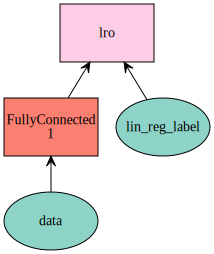

In [6]:
mx.viz.plot_network(symbol=lro)

In [9]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
            num_epoch=10,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))

INFO:root:Epoch[0] Batch [2]	Speed: 2290.72 samples/sec	accuracy=0.666667
INFO:root:Epoch[0] Batch [4]	Speed: 2145.97 samples/sec	accuracy=0.000000
INFO:root:Epoch[0] Batch [6]	Speed: 2244.74 samples/sec	accuracy=0.000000
INFO:root:Epoch[0] Batch [8]	Speed: 2262.30 samples/sec	accuracy=0.000000
INFO:root:Epoch[0] Batch [10]	Speed: 2089.84 samples/sec	accuracy=0.500000
INFO:root:Epoch[0] Batch [12]	Speed: 2096.63 samples/sec	accuracy=0.000000
INFO:root:Epoch[0] Batch [14]	Speed: 1777.62 samples/sec	accuracy=1.000000
INFO:root:Epoch[0] Batch [16]	Speed: 2217.45 samples/sec	accuracy=0.000000
INFO:root:Epoch[0] Batch [18]	Speed: 2290.72 samples/sec	accuracy=0.500000
INFO:root:Epoch[0] Batch [20]	Speed: 2232.20 samples/sec	accuracy=0.000000
INFO:root:Epoch[0] Batch [22]	Speed: 2178.29 samples/sec	accuracy=0.500000
INFO:root:Epoch[0] Batch [24]	Speed: 2325.65 samples/sec	accuracy=0.000000
INFO:root:Epoch[0] Batch [26]	Speed: 2169.28 samples/sec	accuracy=0.500000
INFO:root:Epoch[0] Batch [28]